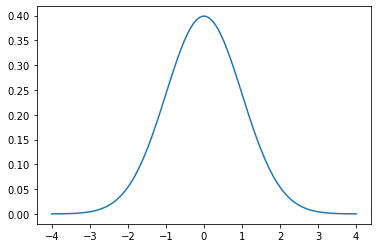

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
mu = 0
std = 1
x = np.linspace(start=-4, stop=4, num=100)
y = stats.norm.pdf(x, mu, std) 
plt.plot(x, y)
plt.show()

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1]


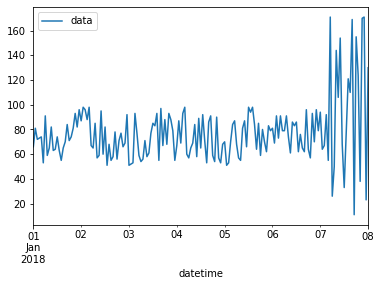

In [53]:
import pandas as pd
from datetime import datetime
import numpy as np
date_rng = pd.date_range(start='1/1/2018', end='1/08/2018', freq='H')
df = pd.DataFrame(date_rng, columns=['date'])


Traindata = np.concatenate((np.random.randint(50,100,size=(len(date_rng)-20)),np.random.randint(0,200,size=20) ))#np.random.randint(0,100,size=(len(date_rng)))


df['data'] = np.concatenate((np.random.randint(50,100,size=(len(date_rng)-20)),np.random.randint(0,200,size=20) ))

df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)



from sklearn.ensemble import IsolationForest
X=[]
for y in df['data'].values:
    X.append([y])

T=[]
for y in Traindata:
    T.append([y])

clf = IsolationForest(random_state=10,max_features=1,max_samples="auto",n_estimators=100).fit(T)
#clf.predict([[0.1], [0], [90]])
print(clf.predict(X))
df.plot()

In [12]:
from sklearn.ensemble import IsolationForest
X = [[-1.1], [0.3], [0.5], [100]]
clf = IsolationForest(random_state=0).fit(X)
clf.predict([[0.1], [0], [90]])
#clf.predict(X)

array([ 1,  1, -1])

In [10]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_train
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

array([[ 2.14901425,  1.95852071],
       [ 2.19430656,  2.45690896],
       [ 1.92975399,  1.92975891],
       [ 2.47376384,  2.23023042],
       [ 1.85915768,  2.16276801],
       [ 1.86097469,  1.86028107],
       [ 2.07258868,  1.42601593],
       [ 1.48252465,  1.83131374],
       [ 1.69615066,  2.0942742 ],
       [ 1.72759278,  1.57630889],
       [ 2.43969463,  1.93226711],
       [ 2.02025846,  1.57257554],
       [ 1.83668518,  2.03327678],
       [ 1.65470193,  2.11270941],
       [ 1.81980839,  1.91249188],
       [ 1.81948802,  2.55568346],
       [ 1.99595083,  1.68268672],
       [ 2.24676347,  1.63374691],
       [ 2.06265908,  1.41209896],
       [ 1.60154419,  2.05905837],
       [ 2.22153997,  2.05141048],
       [ 1.96530552,  1.90966889],
       [ 1.5564434 ,  1.78404674],
       [ 1.86180837,  2.31713667],
       [ 2.10308549,  1.47108795],
       [ 2.09722519,  1.88447532],
       [ 1.7969234 ,  2.18350289],
       [ 2.30929986,  2.27938404],
       [ 1.74823474,